<a href="https://colab.research.google.com/github/KOSHALESHMEHER/House-Price-Prediction/blob/master/seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [0]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

In [0]:
#@title
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1Q_sy-q8WW2geRGLBw6Y8sJcE-i1cwpY2'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [38]:
downloaded.GetContentFile('seminar_original_local.csv')
!ls

adc.json  sample_data  seminar_original_local.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import e

In [40]:
data=pd.read_csv("seminar_original_local.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [41]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [107]:
data_n=data.values   # return a Numpy representation of the given data
m=len(data_n)

print(data_n)
print("\n",m)
print("\n",data_n.shape)

[[7129300520 '20141013T000000' 221900.0 ... -122.257 1340 5650]
 [6414100192 '20141209T000000' 538000.0 ... -122.319 1690 7639]
 [5631500400 '20150225T000000' 180000.0 ... -122.23299999999999 2720 8062]
 ...
 [1523300141 '20140623T000000' 402101.0 ... -122.29899999999999 1020 2007]
 [291310100 '20150116T000000' 400000.0 ... -122.069 1410 1287]
 [1523300157 '20141015T000000' 325000.0 ... -122.29899999999999 1020 1357]]

 21613

 (21613, 21)


In [0]:
def featureNormalization (X):
    mean=np.mean(X,axis=0)
    std_d=[]
    for i in range(X.shape[1]):
           # print("col ",i)
        temp=X[:,i:i+1]
           # print(temp)
           # temp=temp.reshape((temp.shape[0],))
           # print(temp)
        std_d1=np.std(temp)
        std_d.append(std_d1)
           #print("S.D = ",std_d,"\n")

    std_d=np.array(std_d)            # ----------> converting list type (std_d)  to  array tpe(std_d)
    X_norm=(X-mean)/std_d            #             (this is not necessary, only to get ---std_d.shape---which is for array elements only) )
    
    return X_norm,mean,std_d


In [109]:
X1=data_n[:,3:22]

print("\n",X1.shape)
print("\n",X1.shape[0])
print("\n",X1.shape[1])


 (21613, 18)

 21613

 18


In [110]:
X1,mean,std_d = featureNormalization(X1)                       #  (xi - mean) / n
print(X1)

[[-0.3987371485515711 -1.4474635685648467 -0.979835020814843 ...
  -0.30607895778041616 -0.9433551980508947 -0.26071540817101035]
 [-0.3987371485515711 0.1756066952741968 0.5336343403143408 ...
  -0.7463414313938284 -0.4326861903061281 -0.1878677327445369]
 [-1.4739593558684907 -1.4474635685648467 -1.4262540410040268 ...
  -0.1356547744460781 1.0701397467713278 -0.17237524068551316]
 ...
 [-1.4739593558684907 -1.7720776213326552 -1.1540473213764757 ...
  -0.6043212786152302 -1.4102525765603957 -0.39414129131763814]
 [-0.3987371485515711 0.5002207480420054 -0.5225277318405572 ...
  1.028910478337741 -0.8412213965019414 -0.4205114905670403]
 [-1.4739593558684907 -1.7720776213326552 -1.1540473213764757 ...
  -0.6043212786152302 -1.4102525765603957 -0.41794772119557067]]


In [111]:
print(mean)
#print(mean.shape[1])   ---------->   as mean is 1D array
mean.shape

[3.37084162309721 2.1147573219821405 2079.8997362698374 15106.967565816869
 1.4943089807060566 0.007541757275713691 0.23430342849211122
 3.4094295100171195 7.656873178179799 1788.3906907879516 291.5090454818859
 1971.0051357978994 84.40225790033776 98077.93980474715 47.56005251931704
 -122.21389640494083 1986.552491556008 12768.455651691113]


(18,)

In [112]:
print(std_d)
print(std_d.shape)

[9.30040315e-01 7.70145340e-01 9.18419649e+02 4.14195533e+04
 5.39976403e-01 8.65151962e-02 7.66299841e-01 6.50727992e-01
 1.17543156e+00 8.28071820e+02 4.42564804e+02 2.93727313e+01
 4.01669947e+02 5.35037884e+01 1.38560505e-01 1.40825084e-01
 6.85375448e+02 2.73035480e+04]
(18,)


In [113]:
X=np.append(np.ones((m,1)),X1,axis=1)
print(X)

[[1.0 -0.3987371485515711 -1.4474635685648467 ... -0.30607895778041616
  -0.9433551980508947 -0.26071540817101035]
 [1.0 -0.3987371485515711 0.1756066952741968 ... -0.7463414313938284
  -0.4326861903061281 -0.1878677327445369]
 [1.0 -1.4739593558684907 -1.4474635685648467 ... -0.1356547744460781
  1.0701397467713278 -0.17237524068551316]
 ...
 [1.0 -1.4739593558684907 -1.7720776213326552 ... -0.6043212786152302
  -1.4102525765603957 -0.39414129131763814]
 [1.0 -0.3987371485515711 0.5002207480420054 ... 1.028910478337741
  -0.8412213965019414 -0.4205114905670403]
 [1.0 -1.4739593558684907 -1.7720776213326552 ... -0.6043212786152302
  -1.4102525765603957 -0.41794772119557067]]


In [114]:
y=data_n[:,2:3]

print(y)

[[221900.0]
 [538000.0]
 [180000.0]
 ...
 [402101.0]
 [400000.0]
 [325000.0]]


In [115]:
theta=np.zeros((19,1))
print(theta)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [0]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter in a linear regression model
    """
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [0]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """
    
    m=len(y)
    J_cost=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent = alpha * 1/m * error
        theta = theta - descent
        j_cost=computeCost(X,y,theta)
        J_cost.append(j_cost)
        
    
    return theta, J_cost


In [118]:
theta,J_cost = gradientDescent(X,y,theta,0.01,1000)

print("\nh(x) =",round(theta[0,0],2)," + ",round(theta[1,0],2)," x1  + ",round(theta[2,0],2)," x2 + ",round(theta[3,0],2)," x3 + ",round(theta[4,0],2)," x4 + ",round(theta[5,0],2)," x5 + ",round(theta[6,0],2)," x6 + ",round(theta[7,0],2)," x7 + ",round(theta[8,0],2)," x8 + ",round(theta[9,0],2)," x9 + ",round(theta[10,0],2)," x10 + ",round(theta[11,0],2)," x11 + ",round(theta[12,0],2)," x12 + ",round(theta[13,0],2)," x13 + ",round(theta[14,0],2)," x14 + ",round(theta[15,0],2)," x15 + ",round(theta[16,0],2)," x16 + ",round(theta[17,0],2)," x17 + ",round(theta[18,0],2)," x18 ")


h(x) = 540064.83  +  -32517.98  x1  +  30827.1  x2 +  80840.88  x3 +  5652.86  x4 +  4391.79  x5 +  50487.14  x6 +  40290.13  x7 +  18192.95  x8 +  108710.42  x9 +  75186.02  x10 +  27084.01  x11 +  -74144.69  x12 +  8967.13  x13 +  -30173.66  x14 +  83828.73  x15 +  -31214.47  x16 +  20307.06  x17 +  -10433.83  x18 


Text(0.5, 1.0, '\nCost function using Gradient Descent\n')

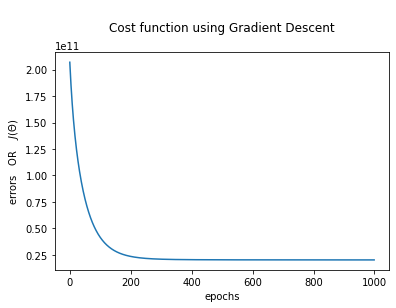

In [119]:
plt.plot(J_cost)
plt.xlabel("epochs")
plt.ylabel("errors   OR    $J(\Theta)$")
plt.title("\nCost function using Gradient Descent\n")
